In [2]:
%matplotlib notebook
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import datetime, timedelta, date, time
from dateutil.relativedelta import relativedelta
from typing import Tuple

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
conn = engine.connect()

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
inspector.get_table_names()

['measurement', 'station']

In [13]:
#because I knew the dates didnt go back a full year wanted find out what the last
#date was
some_list = conn.execute("select date from measurement").fetchall()
last_date = some_list[-1]
print(last_date)

('2017-08-23',)


# Exploratory Climate Analysis

In [14]:
#find dates
date_list = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
#latest_date = pd.to_datetime(date_list[0]).date
#latest_date = pd.to_datetime(latest_date)
start_date = pd.to_datetime(date_list[-1]).date

start_date


array([datetime.date(2010, 1, 1)], dtype=object)

In [15]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date = pd.to_datetime(latest_date[0]).date() - timedelta(days=365)

start_date

datetime.date(2016, 8, 23)

In [16]:
# Calculate the date 1 year ago from today
#One_YearAgo_Today = datetime.now() - relativedelta(years=1)
#One_YearAgo_Today = pd.to_datetime(One_YearAgo_Today)

#One_YearAgo_Today = datetime.now() - timedelta(days=365)
#One_YearAgo_Today = pd.to_datetime(One_YearAgo_Today)

One_YearAgo_Today = latest_date - timedelta(days=365)

One_YearAgo_Today

#???????why can't I get this to work??????

TypeError: unsupported operand type(s) for -: 'result' and 'datetime.timedelta'

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
Year_Prec_Data = (session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= start_date).
                  order_by(Measurement.date.desc()).all())
Year_Prec_Data


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df_year_precipitation = pd.DataFrame(Year_Prec_Data, columns=['date','precipitation'])
df_year_precipitation['date'] = pd.to_datetime(df_year_precipitation['date'], format='%Y/%m/%d')
df_year_precipitation.set_index('date', inplace=True)
df_year_precipitation.head()

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [51]:
Precip_plot_df = df_year_precipitation.groupby(['date'])['precipitation'].mean().reset_index()
#date_list = Precip_plot_df['date']
#prcp_list = Precip_plot_df['precipitation']
Precip_plot_df.set_index('date').head()

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


<IPython.core.display.Javascript object>


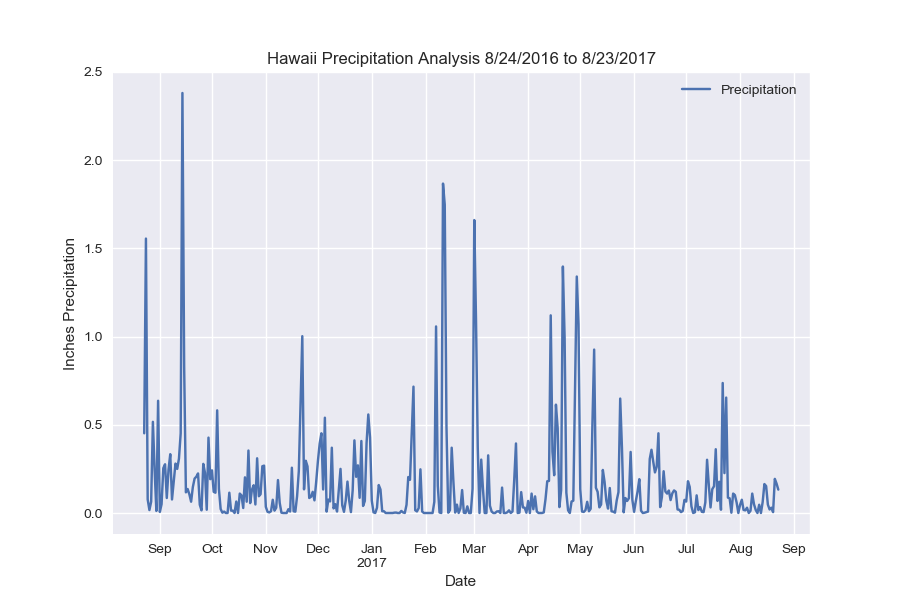

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
Precip_Plot = Precip_plot_df.plot('date', 'precipitation', figsize=(9, 6))
plt.xlabel("Date")
#plt.xticks(np.arange(8), Precip_plot_df['date'], rotation = 'vertical')
plt.ylabel("Inches Precipitation")
plt.title("Hawaii Precipitation Analysis 8/24/2016 to 8/23/2017")
plt.legend(["Precipitation"])
plt.savefig("precipitation.png")
#plt.tight_layout()
plt.show()

# Rotate the xticks for the dates


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_plot_df.describe()

,precipitation
count,58.000000
mean,0.235730
std,0.382161
min,0.000000
25%,0.047500
50%,0.118571
75%,0.253000
max,2.380000


In [24]:
# How many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count[0]

(9)

In [25]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, Station.name, func.count(Measurement.station)).
                   filter(Measurement.station == Station.station).group_by(Measurement.station).
                  order_by(func.count(Measurement.station).desc()).all())

active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Busiest_station = active_stations[0][0]
Busiest_station

Station_info = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs),
                    func.avg(Measurement.tobs)).filter(Measurement.station == Busiest_station).all()
Station_info




[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Max_Station_Data = session.query(Measurement.station, Measurement.tobs, 
                                 func.count(Measurement.tobs)).group_by(
    Measurement.tobs).filter(Measurement.station == Busiest_station).all()

Max_Station_Data



[('USC00519281', 54.0, 1),
 ('USC00519281', 56.0, 4),
 ('USC00519281', 57.0, 6),
 ('USC00519281', 58.0, 6),
 ('USC00519281', 59.0, 5),
 ('USC00519281', 60.0, 15),
 ('USC00519281', 61.0, 19),
 ('USC00519281', 62.0, 37),
 ('USC00519281', 63.0, 33),
 ('USC00519281', 64.0, 41),
 ('USC00519281', 65.0, 71),
 ('USC00519281', 66.0, 80),
 ('USC00519281', 67.0, 111),
 ('USC00519281', 68.0, 143),
 ('USC00519281', 69.0, 193),
 ('USC00519281', 70.0, 227),
 ('USC00519281', 71.0, 265),
 ('USC00519281', 72.0, 290),
 ('USC00519281', 73.0, 278),
 ('USC00519281', 74.0, 261),
 ('USC00519281', 75.0, 204),
 ('USC00519281', 76.0, 148),
 ('USC00519281', 77.0, 111),
 ('USC00519281', 78.0, 88),
 ('USC00519281', 79.0, 54),
 ('USC00519281', 80.0, 43),
 ('USC00519281', 81.0, 22),
 ('USC00519281', 82.0, 11),
 ('USC00519281', 83.0, 3),
 ('USC00519281', 84.0, 1),
 ('USC00519281', 85.0, 1)]

In [28]:
#pulling out measurements
hist_data = session.query(Measurement.tobs).group_by(Measurement.date).all()
hist_data


[(73.0),
 (61.0),
 (76.0),
 (72.0),
 (74.0),
 (71.0),
 (74.0),
 (64.0),
 (67.0),
 (71.0),
 (68.0),
 (68.0),
 (59.0),
 (69.0),
 (67.0),
 (65.0),
 (70.0),
 (76.0),
 (75.0),
 (69.0),
 (71.0),
 (63.0),
 (75.0),
 (76.0),
 (65.0),
 (69.0),
 (65.0),
 (71.0),
 (65.0),
 (69.0),
 (74.0),
 (65.0),
 (69.0),
 (63.0),
 (70.0),
 (66.0),
 (62.0),
 (69.0),
 (69.0),
 (72.0),
 (69.0),
 (69.0),
 (66.0),
 (70.0),
 (73.0),
 (73.0),
 (74.0),
 (69.0),
 (65.0),
 (60.0),
 (74.0),
 (68.0),
 (62.0),
 (71.0),
 (62.0),
 (72.0),
 (71.0),
 (75.0),
 (67.0),
 (66.0),
 (67.0),
 (66.0),
 (65.0),
 (65.0),
 (68.0),
 (69.0),
 (65.0),
 (72.0),
 (66.0),
 (71.0),
 (66.0),
 (74.0),
 (74.0),
 (66.0),
 (69.0),
 (65.0),
 (70.0),
 (67.0),
 (65.0),
 (74.0),
 (77.0),
 (74.0),
 (71.0),
 (67.0),
 (71.0),
 (72.0),
 (74.0),
 (70.0),
 (68.0),
 (70.0),
 (73.0),
 (73.0),
 (67.0),
 (67.0),
 (69.0),
 (69.0),
 (68.0),
 (76.0),
 (68.0),
 (67.0),
 (73.0),
 (68.0),
 (71.0),
 (68.0),
 (67.0),
 (65.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

<IPython.core.display.Javascript object>


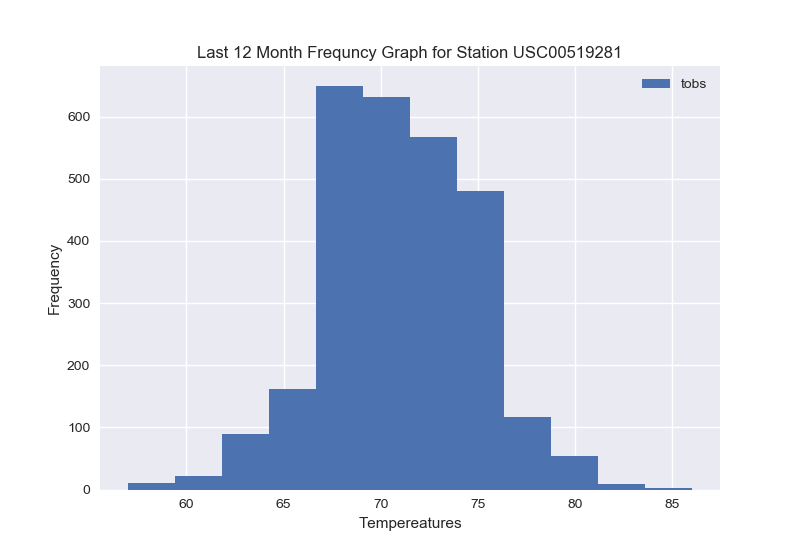

In [29]:
#create histogram
plt_data=pd.DataFrame(hist_data)
plt_data.plot.hist(bins=12)
plt.xlabel("Tempereatures")
plt.title("Last 12 Month Frequncy Graph for Station " + Busiest_station)
plt.savefig("temp_frequency_graph.png")





In [30]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    #start_d = datetime.strptime(start_date,"%Y-%m-%d")
    #end_d = datetime.strptime(end_date,"%Y-%m-%d")
    
    result = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    res_list = list(np.ravel(result))

    return res_list

In [31]:
#THIS IS IMPORTANT BECAUSE IT IS THE INPUTS USED IN THE REST OF THE CODE
start_date_input = '2017-02-28'
end_date_input = '2017-03-05'
start_date = datetime.strptime(start_date_input,"%Y-%m-%d")
end_date = datetime.strptime(end_date_input,"%Y-%m-%d")

In [32]:
temp_range = calc_temps(start_date, end_date)
temp_range

[64.0, 71.96551724137932, 78.0]

<IPython.core.display.Javascript object>


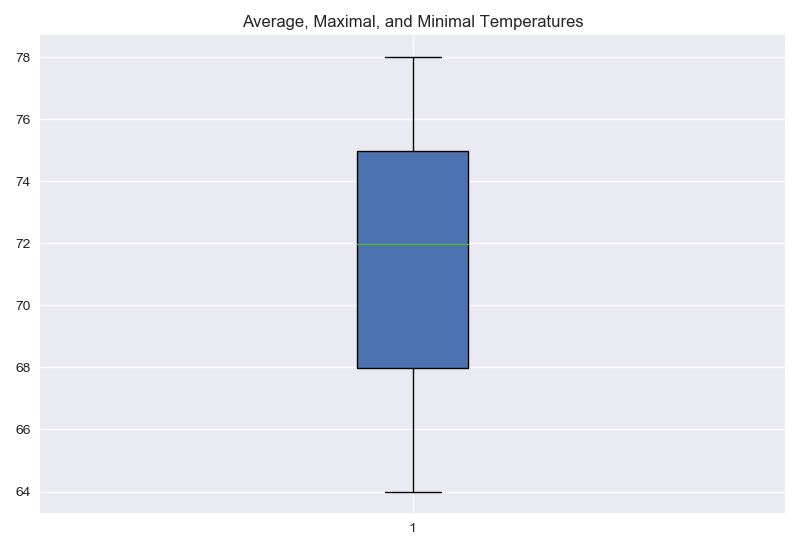

In [69]:
    fig, ax = plt.subplots()
    x = range(len(temp_range))
    ax.boxplot(temp_range, patch_artist=True)
    ax.set_title('Average, Maximal, and Minimal Temperatures')
    plot = fig.tight_layout()
    plt.savefig("calc_temps_boxplot.png")

In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
last_year = dt.timedelta(days=365)
s_year_ago = start_date - last_year
e_year_ago = end_date - last_year

year_ago_data = calc_temps(s_year_ago,e_year_ago)
year_ago_data

[62.0, 69.375, 76.0]

<IPython.core.display.Javascript object>


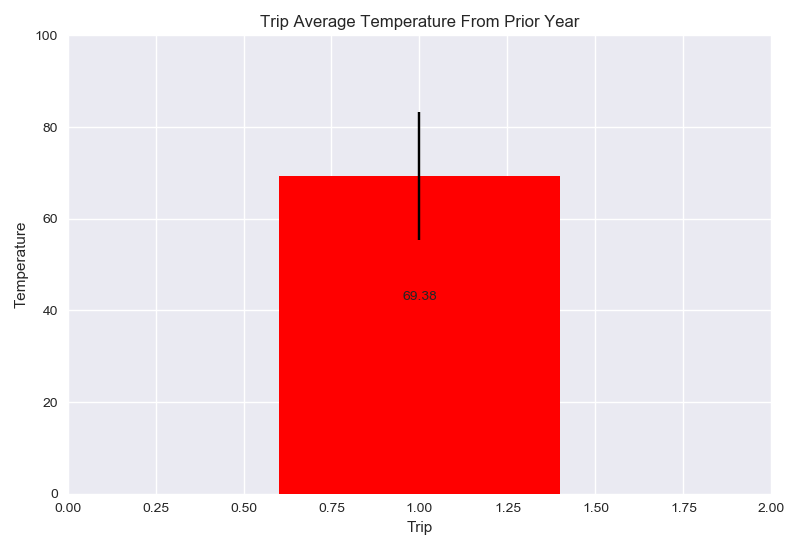

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
peak_to_peak = year_ago_data[2] - year_ago_data[0]
avg_temp = year_ago_data[1]
min_temp = year_ago_data[0]
max_temp = year_ago_data[2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1, avg_temp, color='red', yerr= peak_to_peak)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.savefig("Avg_Temps_from_Last_year_Box_Plot.png")
plt.show()

In [36]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
s_year_ago
e_year_ago

vacation_rain_data = session.query(Station.station, Station.name, Station.latitude, Station.longitude, 
                                   Station.elevation, Measurement.prcp).filter(
    Measurement.date >= s_year_ago).filter(Measurement.date <= e_year_ago).order_by(Measurement.prcp.desc()).all()

vacation_rain_data



[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.33),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.33),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.33),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.33),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  0.33),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.33),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.33),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.33),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.33),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.07),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.07),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',

In [37]:
vacation_data_df = pd.DataFrame(vacation_rain_data)
vacation_data_df.head()

,station,name,latitude,longitude,elevation,prcp
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.33
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,0.33
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,0.33
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,0.33
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,0.33


## Optional Challenge Assignment

In [69]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    res = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    res_as_list = list(np.ravel(res))
    return res_as_list
    
daily_normals("01-01")

[62.0, 69.15384615384616, 77.0]

In [70]:
# calculate the daily normals for your trip
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

delta = end_date - start_date

dates_of_trip = []
for i in range(delta.days + 1):
    result = (start_date + timedelta(i))
    result = result.strftime('%m-%d')
    dates_of_trip.append(result)


# push each tuple of calculations into a list called `normals`
# Loop through the list of %m-%d strings and calculate the normals for each date
tmin = []
tmax = []
tavg = []
for day in dates_of_trip:
    result = daily_normals(day)
    tmin.append(result[0])
    tmax.append(result[2])
    tavg.append(result[1])





[65.0, 64.0, 61.0, 60.0, 57.0, 60.0]

In [74]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df = pd.DataFrame({
    'dates': dates_of_trip,
    'tmin': tmin,
    'tavg': tavg,
    'tmax': tmax
})
daily_normals_df


,dates,tmin,tavg,tmax
0,02-28,65.0,70.655172,80.0
1,03-01,64.0,70.032787,76.0
2,03-02,61.0,70.366667,78.0
3,03-03,60.0,70.068966,78.0
4,03-04,57.0,69.272727,77.0
5,03-05,60.0,67.890909,76.0


<IPython.core.display.Javascript object>


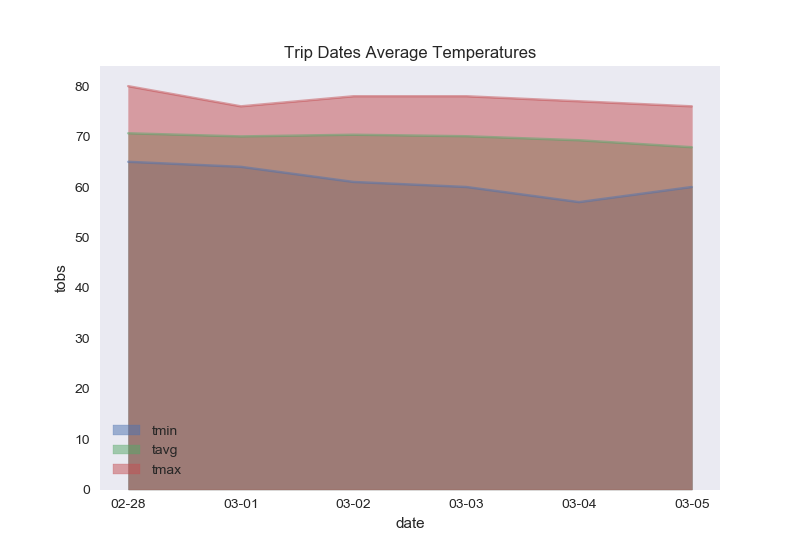

In [78]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_plot = daily_normals_df.plot.area(stacked=False)
plt.xticks([0,1,2,3,4,5], dates_of_trip)
plt.xlabel('date')
plt.ylabel('tobs')
plt.grid()
plt.title(f'Trip Dates Average Temperatures')
plt.savefig("Trip_Dates_Average_Temperatures.png")
plt.show()